<a href="https://colab.research.google.com/github/suyash469/learning-github/blob/main/ds_internship.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Suyash Gupta Data science internship project**

**Summary of Key Data Analysis Findings and Insights**

In [ ]:
import pandas as pd

# Load the dataset to ensure a fresh DataFrame for processing
df = pd.read_csv('Dataset .csv')

# --- 2. Data Preprocessing and Feature Engineering ---
# ---------------------------------------------

# Clean up column names by stripping whitespace, removing BOM character, converting to lowercase,
# and replacing spaces with underscores for robust handling.
df.columns = df.columns.str.strip().str.replace('ï»¿', '', regex=False).str.lower().str.replace(' ', '_')

# Drop rows with missing 'cuisines'
df.dropna(subset=['cuisines'], inplace=True)

# Define columns to drop (high cardinality, irrelevant, or target-leaking) using new standardized names
cols_to_drop = [
    'restaurant_id', 'restaurant_name', 'address', 'locality', 'locality_verbose',
    'longitude', 'latitude', 'currency', 'rating_color', 'rating_text',
    'switch_to_order_menu', 'is_delivering_now'
]
df.drop(columns=cols_to_drop, inplace=True)

# 1. Encode Binary Features ('Yes'/'No') using new standardized names
binary_map = {'Yes': 1, 'No': 0}
df['has_table_booking'] = df['has_table_booking'].map(binary_map)
df['has_online_delivery'] = df['has_online_delivery'].map(binary_map)

# 2. One-Hot Encode 'country_code' using new standardized names
df = pd.get_dummies(df, columns=['country_code'], prefix='Country')

# 3. Handle 'cuisines' (Top 10) using new standardized names
# Split the cuisines string and count occurrences
all_cuisines = df['cuisines'].astype(str).str.split(', ').explode()
top_10_cuisines = all_cuisines.value_counts().nlargest(10).index.tolist()

# Create a new column for each top cuisine
for cuisine in top_10_cuisines:
    df[f'cuisine_{cuisine.lower().replace(" ", "_")}'] = df['cuisines'].apply(lambda x: 1 if cuisine in x else 0)

# Drop the original 'cuisines' column
df.drop(columns=['cuisines'], inplace=True)

# 4. Handle 'city' (Top 10) - One-hot encode only the most frequent cities using new standardized names
top_10_cities = df['city'].value_counts().nlargest(10).index.tolist()
df['city_processed'] = df['city'].apply(lambda x: x if x in top_10_cities else 'Other')
df = pd.get_dummies(df, columns=['city_processed'], prefix='City')
df.drop(columns=['city'], inplace=True)

print("\n--- Preprocessed Data Head (Features) ---")
print(df.drop('aggregate_rating', axis=1).head())


--- Preprocessed Data Head (Features) ---
   average_cost_for_two  has_table_booking  has_online_delivery  price_range  \
0                  1100                  1                    0            3   
1                  1200                  1                    0            3   
2                  4000                  1                    0            4   
3                  1500                  0                    0            4   
4                  1500                  1                    0            4   

   votes  Country_1  Country_14  Country_30  Country_37  Country_94  ...  \
0    314      False       False       False       False       False  ...   
1    591      False       False       False       False       False  ...   
2    270      False       False       False       False       False  ...   
3    365      False       False       False       False       False  ...   
4    229      False       False       False       False       False  ...   

   City_Amritsar  C

In [ ]:
print("\n--- Summary Statistics for DataFrame df ---")
display(df.describe())


--- Summary Statistics for DataFrame df ---


,average_cost_for_two,has_table_booking,has_online_delivery,price_range,aggregate_rating,votes,cuisine_north_indian,cuisine_chinese,cuisine_fast_food,cuisine_mughlai,cuisine_italian,cuisine_bakery,cuisine_continental,cuisine_cafe,cuisine_desserts,cuisine_south_indian
count,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000
mean,1200.326137,0.121358,0.256864,1.804968,2.665238,156.772060,0.415007,0.286418,0.208237,0.104171,0.080067,0.077971,0.077133,0.074093,0.068434,0.066653
std,16128.743876,0.326560,0.436927,0.905563,1.516588,430.203324,0.492749,0.452111,0.406069,0.305498,0.271411,0.268140,0.266816,0.261937,0.252503,0.249433
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,250.000000,0.000000,0.000000,1.000000,2.500000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,400.000000,0.000000,0.000000,2.000000,3.200000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,700.000000,0.000000,1.000000,2.000000,3.700000,130.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,800000.000000,1.000000,1.000000,4.000000,4.900000,10934.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
print("\n--- Data Types of DataFrame df ---")
df.info()


--- Data Types of DataFrame df ---
<class 'pandas.core.frame.DataFrame'>
Index: 9542 entries, 0 to 9550
Data columns (total 42 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   average_cost_for_two  9542 non-null   int64  
 1   has_table_booking     9542 non-null   int64  
 2   has_online_delivery   9542 non-null   int64  
 3   price_range           9542 non-null   int64  
 4   aggregate_rating      9542 non-null   float64
 5   votes                 9542 non-null   int64  
 6   Country_1             9542 non-null   bool   
 7   Country_14            9542 non-null   bool   
 8   Country_30            9542 non-null   bool   
 9   Country_37            9542 non-null   bool   
 10  Country_94            9542 non-null   bool   
 11  Country_148           9542 non-null   bool   
 12  Country_162           9542 non-null   bool   
 13  Country_166           9542 non-null   bool   
 14  Country_184           9542 non-null   boo

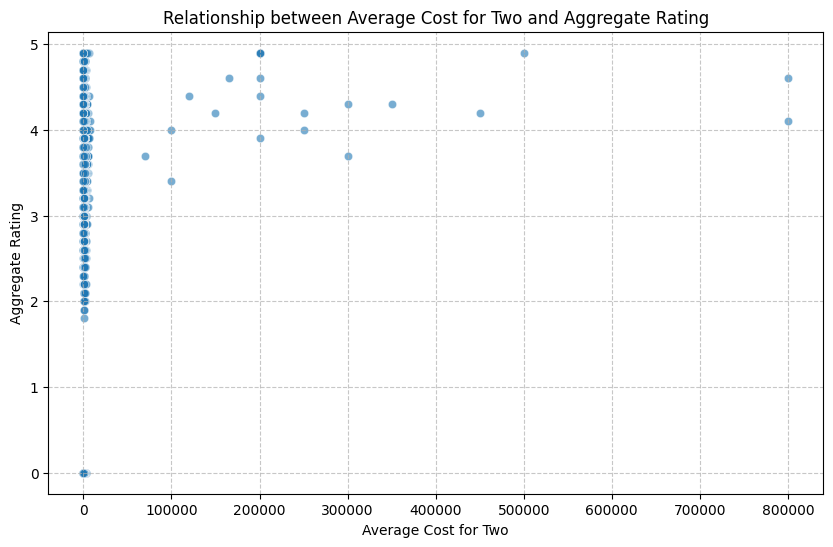

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='average_cost_for_two', y='aggregate_rating', data=df, alpha=0.6)
plt.title('Relationship between Average Cost for Two and Aggregate Rating')
plt.xlabel('Average Cost for Two')
plt.ylabel('Aggregate Rating')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

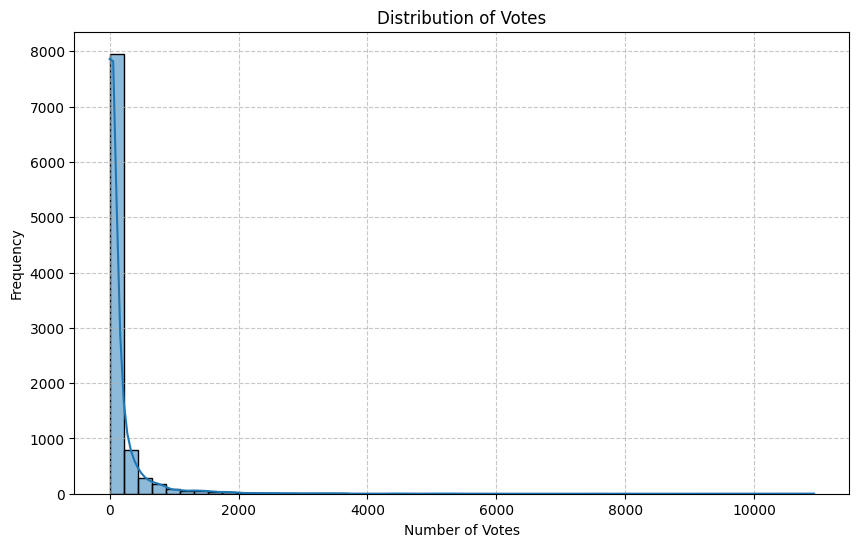

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['votes'], bins=50, kde=True)
plt.title('Distribution of Votes')
plt.xlabel('Number of Votes')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [ ]:
print("\n--- Summary Statistics for Cuisine City Distribution ---")
display(cuisine_city_distribution.describe())


--- Summary Statistics for Cuisine City Distribution ---


,north_indian,chinese,fast_food,mughlai,italian,bakery,continental,cafe,desserts,south_indian
count,10.000000,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,364.500000,248.600000,188.100000,94.000000,55.80000,69.900000,58.000000,52.100000,55.100000,57.400000
std,753.407113,508.489091,404.160433,195.695909,116.26961,144.772197,115.621989,99.880429,118.616516,127.282014
min,6.000000,4.000000,1.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,9.250000,6.000000,2.500000,1.250000,2.75000,1.000000,4.750000,5.750000,1.250000,1.000000
50%,12.500000,11.500000,7.000000,3.500000,7.50000,1.500000,9.000000,8.000000,4.500000,3.000000
75%,411.500000,267.000000,182.250000,95.250000,50.75000,76.500000,49.500000,55.500000,51.750000,55.250000
max,2425.000000,1638.000000,1304.000000,628.000000,376.00000,465.000000,373.000000,325.000000,383.000000,411.000000


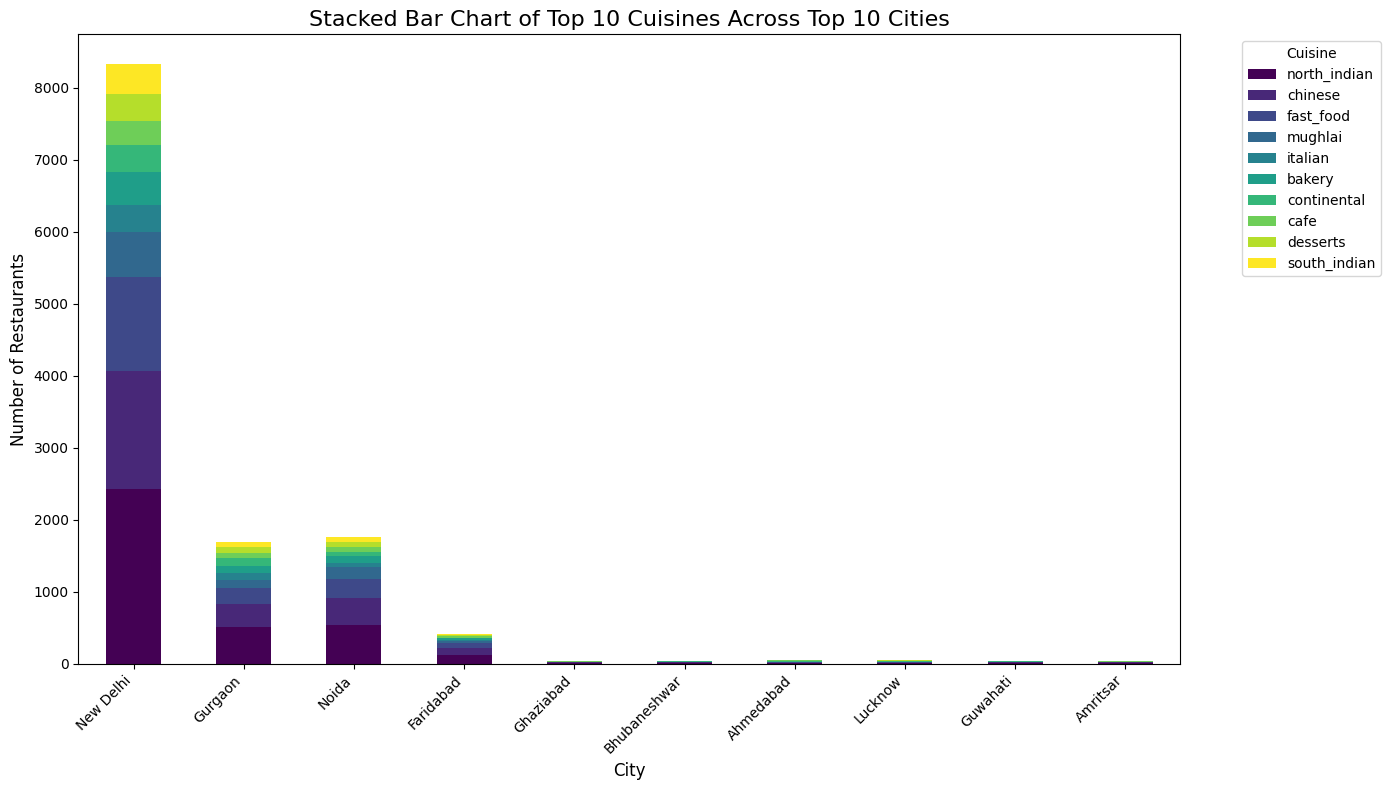

In [ ]:
import matplotlib.pyplot as plt

# Plotting a stacked bar chart
ax = cuisine_city_distribution.plot(kind='bar', stacked=True, figsize=(14, 8), cmap='viridis')
plt.title('Stacked Bar Chart of Top 10 Cuisines Across Top 10 Cities', fontsize=16)
plt.xlabel('City', fontsize=12)
plt.ylabel('Number of Restaurants', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.legend(title='Cuisine', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Task
Calculate the distribution of the top 10 cuisines across the top 10 cities by grouping the preprocessed DataFrame `df` by city and counting the occurrences of each top cuisine within that city. Store the results in a new DataFrame, `cuisine_city_distribution`, where rows represent cities and columns represent cuisines. Then, visualize this distribution using a heatmap.

## Calculate Cuisine Distribution per City

### Subtask:
Group the preprocessed DataFrame `df` by city and count the occurrences of each top cuisine within that city. Store the results in a new DataFrame, `cuisine_city_distribution`, where rows represent cities and columns represent cuisines.


**Reasoning**:
First, I'll create the `cuisine_columns` and `city_columns` lists as specified in the instructions. `cuisine_columns` will contain the names of the one-hot encoded cuisine features, and `city_columns` will contain the names of the one-hot encoded city features (excluding 'City_Other').



In [ ]:
cuisine_columns = [f'cuisine_{cuisine.lower().replace(" ", "_")}' for cuisine in top_10_cuisines]
city_columns = [f'City_{city}' for city in top_10_cities if city != 'Other']

print("Generated cuisine columns:", cuisine_columns)
print("Generated city columns:", city_columns)

Generated cuisine columns: ['cuisine_north_indian', 'cuisine_chinese', 'cuisine_fast_food', 'cuisine_mughlai', 'cuisine_italian', 'cuisine_bakery', 'cuisine_continental', 'cuisine_cafe', 'cuisine_desserts', 'cuisine_south_indian']
Generated city columns: ['City_New Delhi', 'City_Gurgaon', 'City_Noida', 'City_Faridabad', 'City_Ghaziabad', 'City_Bhubaneshwar', 'City_Ahmedabad', 'City_Lucknow', 'City_Guwahati', 'City_Amritsar']


**Reasoning**:
Now that the `cuisine_columns` and `city_columns` lists are prepared, I will initialize an empty DataFrame `cuisine_city_distribution` with appropriate city and cuisine names as index and columns respectively. Then, I will iterate through each city, filter the main DataFrame, sum the cuisine counts for that city, and populate the `cuisine_city_distribution` DataFrame. Finally, I will convert the values to integers as specified.



In [ ]:
import pandas as pd

# Extract clean city names for the index
clean_city_names = [col.replace('City_', '') for col in city_columns]

# Extract clean cuisine names for the columns
clean_cuisine_names = [col.replace('cuisine_', '') for col in cuisine_columns]

# Initialize an empty DataFrame for cuisine distribution per city
cuisine_city_distribution = pd.DataFrame(index=clean_city_names, columns=clean_cuisine_names)

# Iterate through each city column to populate the DataFrame
for city_col in city_columns:
    city_name = city_col.replace('City_', '')

    # Filter df for the current city
    city_df = df[df[city_col] == True]

    # Calculate the sum of each cuisine for the current city
    # Only sum if city_df is not empty to avoid errors on empty slices
    if not city_df.empty:
        cuisine_counts = city_df[cuisine_columns].sum()
        # Assign counts to the corresponding row in cuisine_city_distribution
        cuisine_city_distribution.loc[city_name] = cuisine_counts.values
    else:
        # If no restaurants in this city, set counts to 0
        cuisine_city_distribution.loc[city_name] = 0

# Convert all values to integer data type
cuisine_city_distribution = cuisine_city_distribution.astype(int)

print("\n--- Cuisine Distribution per City ---")
display(cuisine_city_distribution.head())


--- Cuisine Distribution per City ---


,north_indian,chinese,fast_food,mughlai,italian,bakery,continental,cafe,desserts,south_indian
New Delhi,2425,1638,1304,628,376,465,373,325,383,411
Gurgaon,508,324,220,117,84,109,103,78,77,70
Noida,532,384,265,155,64,93,62,69,64,68
Faridabad,122,96,69,30,11,27,8,15,15,17
Ghaziabad,10,6,8,2,0,2,1,4,3,3


## Visualize Cuisine Distribution

### Subtask:
Generate a heatmap or a stacked bar chart to visualize the distribution of cuisines across the top cities. This will help identify which cuisines are popular in which urban areas.


**Reasoning**:
The subtask is to visualize the distribution of cuisines across cities using a heatmap. I will use `seaborn.heatmap` to create the visualization, setting `annot=True` and `fmt='d'` to display the counts, and adding appropriate titles and labels for clarity.



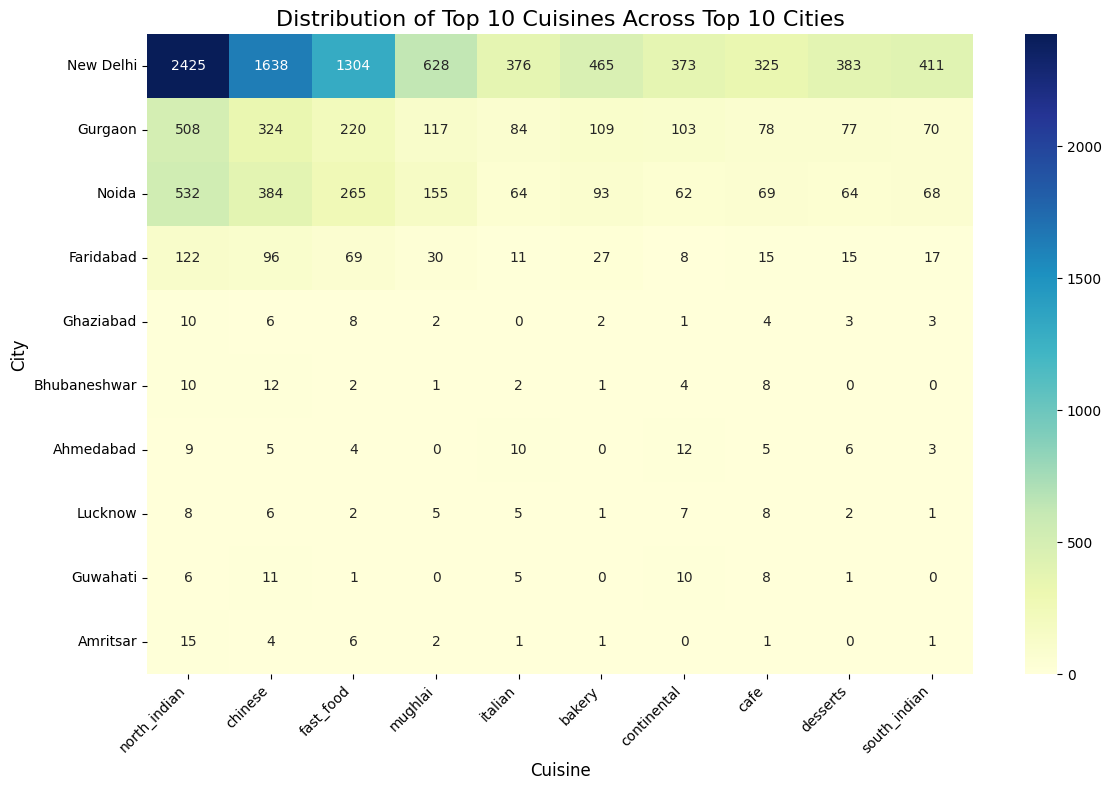

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(cuisine_city_distribution, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Distribution of Top 10 Cuisines Across Top 10 Cities', fontsize=16)
plt.xlabel('Cuisine', fontsize=12)
plt.ylabel('City', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## Final Task

### Subtask:
Summarize the key insights from the cuisine distribution analysis across cities.


## Summary:

### Data Analysis Key Findings
*   The `cuisine_city_distribution` DataFrame was successfully generated, detailing the count of each of the top 10 cuisines across the top 10 cities.
*   New Delhi consistently exhibits the highest number of restaurants for most top cuisines, with 2425 North Indian and 1638 Chinese restaurants, indicating a diverse and dominant culinary scene.
*   Cities like Gurgaon and Noida show significant, albeit lower, cuisine counts compared to New Delhi, suggesting a varied but less concentrated restaurant market.
*   Ghaziabad generally registers the lowest counts across the top 10 cuisines among the analyzed cities, implying fewer establishments offering these popular cuisines.
*   A heatmap was successfully generated, providing a clear visual representation of the distribution of these cuisines across the cities, with counts annotated for easy interpretation.

### Insights or Next Steps
*   New Delhi serves as a major culinary hub, offering a wide array of popular cuisines compared to other top cities, which could be attributed to its larger population or higher demand for diverse food options.
*   The visualization clearly highlights cities with a high concentration of specific cuisines, which could be used to identify potential market gaps or saturation for restaurateurs or food delivery services.


# Task
Analyze the distribution of the target variable `aggregate_rating` using a histogram and KDE plot to identify its shape and any potential class imbalances.

## Analyze Target Variable Distribution

### Subtask:
Analyze the distribution of the target variable (`aggregate_rating`) using a histogram and KDE plot to identify its shape and any potential class imbalances.


**Reasoning**:
To analyze the distribution of the target variable `aggregate_rating`, I will create a histogram with a Kernel Density Estimate (KDE) plot using `seaborn.histplot`. This will allow me to visually inspect its shape, central tendency, spread, and identify any potential class imbalances or distinct groups.



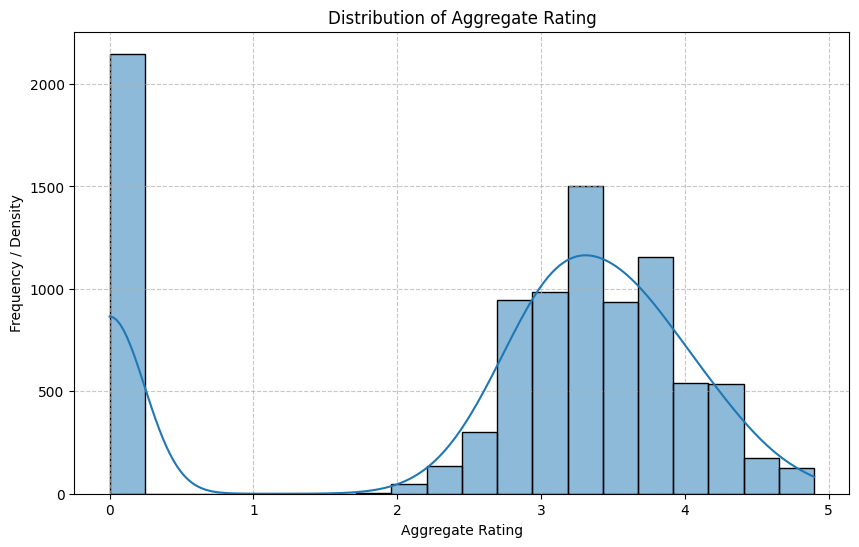

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['aggregate_rating'], bins=20, kde=True)
plt.title('Distribution of Aggregate Rating')
plt.xlabel('Aggregate Rating')
plt.ylabel('Frequency / Density')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### Summary of Aggregate Rating Distribution

The histogram and KDE plot of `aggregate_rating` reveal several key characteristics:

*   **High Concentration at Zero:** There's a significant peak at 0.0, indicating a large number of restaurants with no ratings or very low ratings. This suggests a potential class imbalance or a large group of unrated/poorly rated establishments.
*   **Right-Skewed Distribution:** Beyond the peak at zero, the distribution is generally right-skewed, meaning most of the positive ratings are concentrated towards the lower end (around 2.5 to 3.5), with a long tail extending towards higher ratings (4.0-4.9).
*   **Multiple Modes (or Bimodal/Multimodal tendency):** While there's a strong peak at 0.0, among the positive ratings, there appears to be another prominent peak around 3.5-4.0. This could indicate distinct groups of restaurants—perhaps those that are rarely rated, those with moderate ratings, and a smaller group of highly-rated establishments.
*   **Sparse High Ratings:** Very high ratings (above 4.5) are less frequent, suggesting that achieving top ratings is challenging for restaurants in this dataset.

**Implications:**
*   The abundance of zero ratings needs careful consideration during modeling. It might represent restaurants with insufficient data, or genuinely poor performance, and could be treated as a separate category or imputed if appropriate.
*   The skewed distribution of positive ratings implies that models might perform better on predicting average ratings than on distinguishing between very high ratings due to fewer examples in the higher ranges.
*   The clear separation between 0.0 ratings and positive ratings suggests that a two-stage modeling approach (e.g., first predicting if a restaurant has a positive rating, then predicting the rating itself) could be beneficial.

## Calculate Table Booking and Online Delivery Percentages

### Subtask:
Calculate and display the percentage of restaurants that offer table booking and online delivery from the `has_table_booking` and `has_online_delivery` columns.


**Reasoning**:
To calculate the percentages, I will sum the 'has_table_booking' and 'has_online_delivery' columns, divide by the total number of rows in the DataFrame `df`, and then multiply by 100. Finally, I will print these percentages with clear labels.



In [ ]:
total_restaurants = len(df)

# Calculate percentage of restaurants offering table booking
percentage_table_booking = (df['has_table_booking'].sum() / total_restaurants) * 100

# Calculate percentage of restaurants offering online delivery
percentage_online_delivery = (df['has_online_delivery'].sum() / total_restaurants) * 100

print(f"Percentage of restaurants offering Table Booking: {percentage_table_booking:.2f}%")
print(f"Percentage of restaurants offering Online Delivery: {percentage_online_delivery:.2f}%")

Percentage of restaurants offering Table Booking: 12.14%
Percentage of restaurants offering Online Delivery: 25.69%


## Compare Ratings with/without Table Booking

### Subtask:
Compare the average `aggregate_rating` for restaurants that offer table booking versus those that do not, and visualize the comparison.


**Reasoning**:
To compare the average `aggregate_rating` for restaurants with and without table booking, I will first calculate the mean of `aggregate_rating` for each group based on the `has_table_booking` column.



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the average aggregate_rating for restaurants with and without table booking
average_rating_table_booking = df.groupby('has_table_booking')['aggregate_rating'].mean()

print("Average Aggregate Rating:")
print(average_rating_table_booking)


Average Aggregate Rating:
has_table_booking
0    2.557956
1    3.441969
Name: aggregate_rating, dtype: float64


**Reasoning**:
To visualize the comparison of average aggregate ratings, I will create a bar plot using the previously calculated `average_rating_table_booking` data, labeling the axes and providing a descriptive title as instructed.



/tmp/ipython-input-277713880.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_rating_table_booking.index, y=average_rating_table_booking.values, palette='viridis')


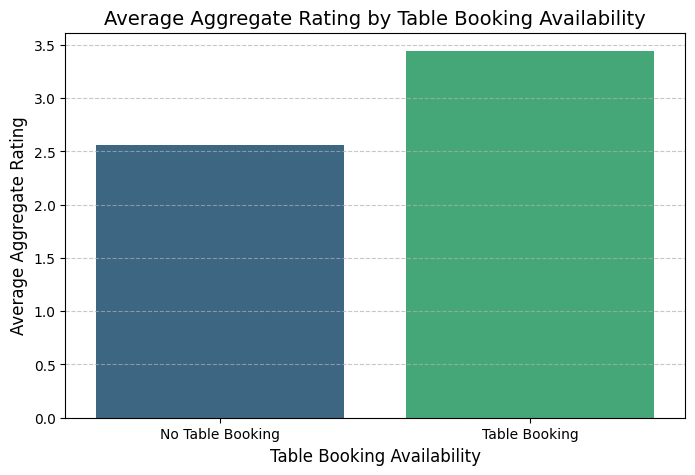

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(x=average_rating_table_booking.index, y=average_rating_table_booking.values, palette='viridis')
plt.xticks([0, 1], ['No Table Booking', 'Table Booking'])
plt.title('Average Aggregate Rating by Table Booking Availability', fontsize=14)
plt.xlabel('Table Booking Availability', fontsize=12)
plt.ylabel('Average Aggregate Rating', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Reasoning**:
The previous code generated a `FutureWarning` from seaborn regarding the use of `palette` without `hue`. To fix this, I will explicitly assign the `x` variable to `hue` and set `legend=False` in the `sns.barplot` call, as suggested by the warning.



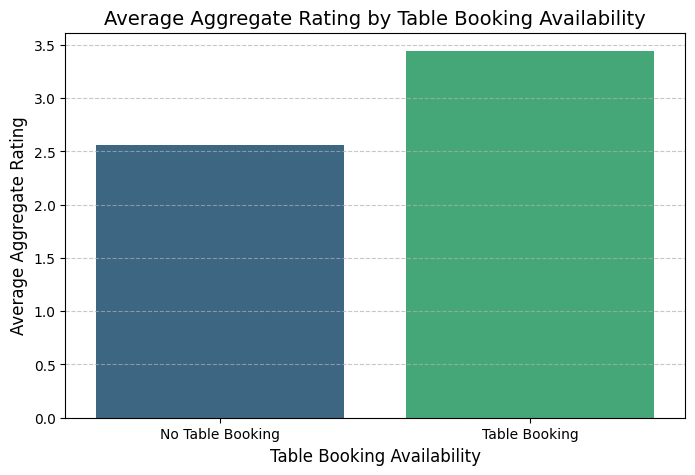

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(x=average_rating_table_booking.index, y=average_rating_table_booking.values, hue=average_rating_table_booking.index, palette='viridis', legend=False)
plt.xticks([0, 1], ['No Table Booking', 'Table Booking'])
plt.title('Average Aggregate Rating by Table Booking Availability', fontsize=14)
plt.xlabel('Table Booking Availability', fontsize=12)
plt.ylabel('Average Aggregate Rating', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Analyze Online Delivery by Price Range

### Subtask:
Analyze the availability of online delivery among restaurants with different `price_range` categories and visualize the findings.


**Reasoning**:
To analyze the availability of online delivery across different price ranges, I will group the DataFrame by `price_range` and calculate the mean of the `has_online_delivery` column for each group. This will provide the proportion of restaurants offering online delivery within each price category.



In [ ]:
online_delivery_by_price_range = df.groupby('price_range')['has_online_delivery'].mean()

print("Proportion of restaurants offering online delivery by Price Range:")
print(online_delivery_by_price_range)

Proportion of restaurants offering online delivery by Price Range:
price_range
1    0.157954
2    0.413106
3    0.292527
4    0.090444
Name: has_online_delivery, dtype: float64


**Reasoning**:
To visualize the proportion of online delivery by price range, I will create a bar plot using the `online_delivery_by_price_range` series, ensuring appropriate labels, title, and a clear presentation.



/tmp/ipython-input-2514894263.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=online_delivery_by_price_range.index, y=online_delivery_by_price_range.values, palette='viridis')


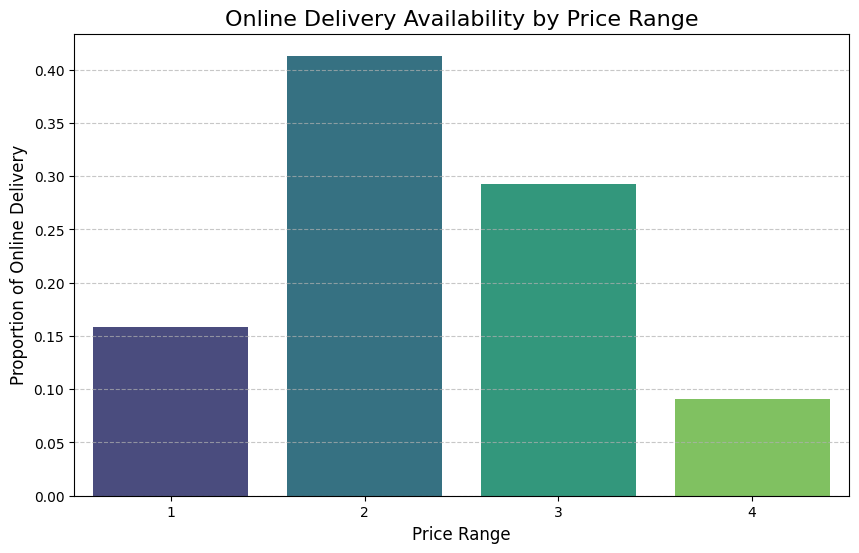

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x=online_delivery_by_price_range.index, y=online_delivery_by_price_range.values, palette='viridis')
plt.title('Online Delivery Availability by Price Range', fontsize=16)
plt.xlabel('Price Range', fontsize=12)
plt.ylabel('Proportion of Online Delivery', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Reasoning**:
The previous code generated a `FutureWarning` from seaborn regarding the use of `palette` without `hue`. To fix this, I will explicitly assign the `x` variable to `hue` and set `legend=False` in the `sns.barplot` call, as suggested by the warning.



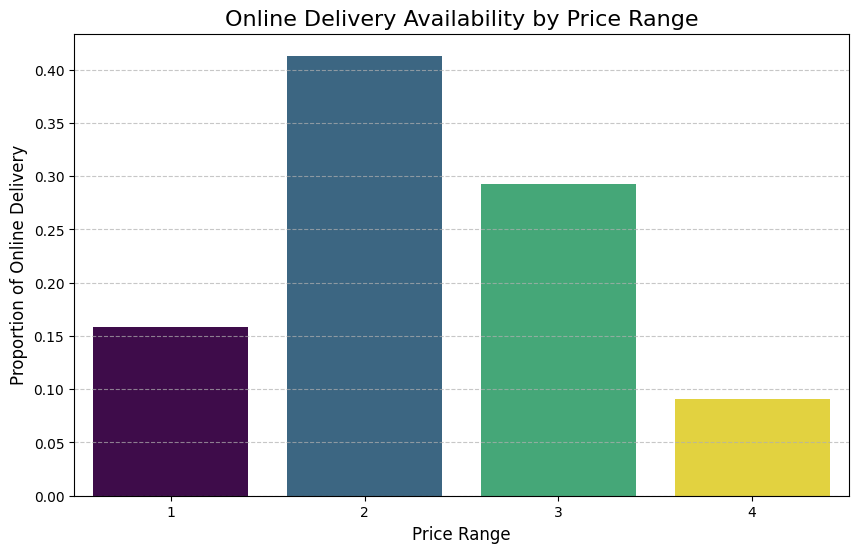

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x=online_delivery_by_price_range.index, y=online_delivery_by_price_range.values, hue=online_delivery_by_price_range.index, palette='viridis', legend=False)
plt.title('Online Delivery Availability by Price Range', fontsize=16)
plt.xlabel('Price Range', fontsize=12)
plt.ylabel('Proportion of Online Delivery', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Determine Most Common Price Range

### Subtask:
Determine and display the most common `price_range` among all restaurants.


**Reasoning**:
To determine the most common price range, I will use the `value_counts()` method on the 'price_range' column of the DataFrame `df` and then select the top value. I will then print the result.



In [ ]:
most_common_price_range = df['price_range'].value_counts().idxmax()
print(f"The most common price range among all restaurants is: {most_common_price_range}")

The most common price range among all restaurants is: 1


## Calculate Average Rating per Price Range

### Subtask:
Calculate the average `aggregate_rating` for each `price_range`.


**Reasoning**:
To calculate the average `aggregate_rating` for each `price_range`, I will group the DataFrame `df` by `price_range` and then compute the mean of the `aggregate_rating` for each group. Finally, I will print the result.



In [ ]:
average_rating_per_price_range = df.groupby('price_range')['aggregate_rating'].mean()

print("Average Aggregate Rating per Price Range:")
print(average_rating_per_price_range)

Average Aggregate Rating per Price Range:
price_range
1    1.997476
2    2.941054
3    3.682633
4    3.817918
Name: aggregate_rating, dtype: float64


## Identify Price Range with Highest Average Rating

### Subtask:
Identify the `price_range` that has the highest average `aggregate_rating` (since `rating_color` was dropped).


**Reasoning**:
To identify the price range with the highest average aggregate rating, I will use the `.idxmax()` method on the `average_rating_per_price_range` series, which was previously computed to contain the average rating for each price range.



In [ ]:
price_range_highest_rating = average_rating_per_price_range.idxmax()
print(f"The price range with the highest average aggregate rating is: {price_range_highest_rating}")

The price range with the highest average aggregate rating is: 4


## Final Task

### Subtask:
Summarize the key findings from the analysis of the remaining tasks, covering target variable distribution, table booking/online delivery insights, and price range analysis.


## Summary:

### Data Analysis Key Findings

*   **Aggregate Rating Distribution:** The `aggregate_rating` distribution shows a significant peak at 0.0, indicating a large number of restaurants with no or very low ratings. Among positive ratings, the distribution is right-skewed, with most ratings concentrated between 2.5 and 3.5, and very high ratings (above 4.5) are sparse.
*   **Table Booking and Online Delivery Penetration:**
    *   Only 12.14% of restaurants offer table booking.
    *   25.69% of restaurants offer online delivery.
*   **Impact of Table Booking on Ratings:** Restaurants offering table booking have a significantly higher average `aggregate_rating` of approximately 3.44, compared to restaurants without table booking, which average around 2.56.
*   **Online Delivery by Price Range:** The proportion of restaurants offering online delivery varies across price ranges:
    *   Price Range 1: \~15.8%
    *   Price Range 2: \~41.3% (highest proportion)
    *   Price Range 3: \~29.3%
    *   Price Range 4: \~9.0% (lowest proportion)
*   **Price Range Analysis:**
    *   The most common `price_range` among all restaurants is '1'.
    *   There is a positive correlation between `price_range` and `aggregate_rating`:
        *   Price Range 1: Average rating of \~2.00
        *   Price Range 2: Average rating of \~2.94
        *   Price Range 3: Average rating of \~3.68
        *   Price Range 4: Average rating of \~3.82
    *   Price Range '4' has the highest average `aggregate_rating`.

### Insights or Next Steps

*   The prevalence of zero ratings in `aggregate_rating` suggests a need for a specific modeling strategy, potentially treating them as a separate category or using a two-stage approach to first predict if a rating exists, then the rating itself.
*   Restaurants with higher price ranges and those offering table booking tend to have better aggregate ratings, indicating these features might be indicators of quality or customer satisfaction, which could be leveraged for marketing or service improvement.
